# Machine Learning in Python - Project 1

Due Sunday, March 8th by 4 pm.

*Contributors: Scarlett Jiang, Jiaying Yang, Yaxin Liu, Chuanhao Li*

## Setup

*Install any packages here and load data*

In [69]:
# Add any additional libraries or submodules below
# Sklearn modules
import sklearn
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing necessary libraries for the analysis
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80



In [2]:
# Load data in easyshare.csv
d = pd.read_csv("easyshare.csv")
d.head()

mergeid  int_year  wave  country  country_mod  female        age  \
0  AT-000674-01    2011.0   4.0     11.0         40.0     1.0  59.700001   
1  AT-001215-01    2011.0   4.0     11.0         40.0     1.0  72.599998   
2  AT-001492-01    2011.0   4.0     11.0         40.0     1.0  59.599998   
3  AT-001492-02    2011.0   4.0     11.0         40.0     0.0  59.799999   
4  AT-001816-01    2004.0   1.0     11.0         40.0     1.0  61.299999   

   birth_country  citizenship  isced1997_r  ...  bmi2  smoking  ever_smoked  \
0           40.0         40.0          5.0  ...   2.0      5.0          5.0   
1          528.0        528.0          5.0  ...   3.0      1.0          1.0   
2           40.0         40.0          3.0  ...   2.0      5.0          1.0   
3           40.0         40.0          4.0  ...   2.0      1.0          1.0   
4           40.0         40.0          3.0  ...   2.0      5.0          1.0   

   br010_mod  br015_  casp  chronic_mod  sp008_  ch001_  cogscore  
0        5.0     1.0  44.0          1.0     5.0     2.0       8.0  
1        2.0     1.0  35.0          6.0     1.0     0.0      14.5  
2        7.0     2.0  43.0          1.0     5.0     6.0      18.5  
3        7.0     3.0  47.0          1.0     NaN     6.0      24.0  
4        4.0     3.0  43.0          0.0     5.0     2.0      20.0  

[5 rows x 23 columns]

# Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a professional body (e.g. European Union, Governments, Health Institutes and/or Charities on dementia and ageing). If you use any additional data sources, you should introduce them here and discuss why they were included.*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98348 entries, 0 to 98347
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mergeid        97372 non-null  object 
 1   int_year       97372 non-null  float64
 2   wave           97372 non-null  float64
 3   country        97372 non-null  float64
 4   country_mod    97372 non-null  float64
 5   female         97372 non-null  float64
 6   age            97372 non-null  float64
 7   birth_country  97170 non-null  float64
 8   citizenship    97281 non-null  float64
 9   isced1997_r    97372 non-null  float64
 10  eduyears_mod   84532 non-null  float64
 11  eurod          95838 non-null  float64
 12  bmi            94686 non-null  float64
 13  bmi2           94686 non-null  float64
 14  smoking        96887 non-null  float64
 15  ever_smoked    97116 non-null  float64
 16  br010_mod      79210 non-null  float64
 17  br015_         97113 non-null  float64
 18  casp  

The first variable, mergeid, is a unique identifier for each participant, which is in the type of object. Since it is not useful for our analysis and can be dropped.

In [4]:
# Drop the mergeid column
new_d = d.iloc[:, 1:]

In [5]:
# Check the info of the new DataFrame
new_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98348 entries, 0 to 98347
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   int_year       97372 non-null  float64
 1   wave           97372 non-null  float64
 2   country        97372 non-null  float64
 3   country_mod    97372 non-null  float64
 4   female         97372 non-null  float64
 5   age            97372 non-null  float64
 6   birth_country  97170 non-null  float64
 7   citizenship    97281 non-null  float64
 8   isced1997_r    97372 non-null  float64
 9   eduyears_mod   84532 non-null  float64
 10  eurod          95838 non-null  float64
 11  bmi            94686 non-null  float64
 12  bmi2           94686 non-null  float64
 13  smoking        96887 non-null  float64
 14  ever_smoked    97116 non-null  float64
 15  br010_mod      79210 non-null  float64
 16  br015_         97113 non-null  float64
 17  casp           84065 non-null  float64
 18  chroni

In [6]:
# Generate descriptive statistics for numerical variables
descriptive_stats = new_d.describe()

In [7]:
# Output the descriptive statistics
descriptive_stats

int_year          wave       country   country_mod        female  \
count  97372.000000  97372.000000  97372.000000  97372.000000  97372.000000   
mean    2010.467537      3.794612     24.272080    384.954135      0.541480   
std        4.632490      2.146070     12.298221    229.261059      0.498279   
min     2004.000000      1.000000     11.000000     40.000000      0.000000   
25%     2006.000000      2.000000     15.000000    208.000000      0.000000   
50%     2011.000000      4.000000     20.000000    300.000000      1.000000   
75%     2013.000000      5.000000     31.000000    616.000000      1.000000   
max     2020.000000      8.000000     63.000000    756.000000      1.000000   

                age  birth_country   citizenship   isced1997_r  eduyears_mod  \
count  97372.000000   97170.000000  97281.000000  97372.000000  84532.000000   
mean      67.938640     398.304456    391.759830      2.658916     10.427832   
std        8.864202     237.542164    232.965078      1.493547      4.264231   
min       55.099998       2.000000      4.000000      0.000000      0.000000   
25%       60.500000     208.000000    208.000000      1.000000      8.000000   
50%       66.599998     348.000000    348.000000      3.000000     11.000000   
75%       74.199997     642.000000    620.000000      3.000000     13.000000   
max      111.599998    1101.000000   1132.000000      6.000000     30.000000   

       ...          bmi2       smoking   ever_smoked     br010_mod  \
count  ...  94686.000000  96887.000000  97116.000000  79210.000000   
mean   ...      2.849788      4.341790      3.255282      3.345916   
std    ...      0.762833      1.483112      1.983651      2.244878   
min    ...      1.000000      1.000000      1.000000      1.000000   
25%    ...      2.000000      5.000000      1.000000      1.000000   
50%    ...      3.000000      5.000000      5.000000      3.000000   
75%    ...      3.000000      5.000000      5.000000      5.000000   
max    ...      4.000000      5.000000      5.000000      7.000000   

             br015_          casp   chronic_mod        sp008_        ch001_  \
count  97113.000000  84065.000000  97283.000000  83175.000000  96928.000000   
mean       2.672248     36.744008      1.305922      3.978635      2.173335   
std        1.325228      6.463052      1.269872      1.744222      1.403437   
min        1.000000     12.000000      0.000000      1.000000      0.000000   
25%        1.000000     32.000000      0.000000      1.000000      1.000000   
50%        3.000000     37.000000      1.000000      5.000000      2.000000   
75%        4.000000     42.000000      2.000000      5.000000      3.000000   
max        4.000000     48.000000      9.000000      5.000000     17.000000   

           cogscore  
count  97372.000000  
mean      11.973714  
std        4.184386  
min        0.000000  
25%        9.000000  
50%       12.000000  
75%       15.000000  
max       26.000000  

[8 rows x 22 columns]

In [8]:
# Check for missing values
missing_values = new_d.isnull().sum()

# Output the results
missing_values

int_year           976
wave               976
country            976
country_mod        976
female             976
age                976
birth_country     1178
citizenship       1067
isced1997_r        976
eduyears_mod     13816
eurod             2510
bmi               3662
bmi2              3662
smoking           1461
ever_smoked       1232
br010_mod        19138
br015_            1235
casp             14283
chronic_mod       1065
sp008_           15173
ch001_            1420
cogscore           976
dtype: int64

Here we can see that there are missing values in the dataset. We will use KNN imputation to fill in the missing values with the mean value from the 5 nearest neighbors found in the training set.

- **Contextual Background:** Briefly describe the prevalence and impact of dementia in Europe, highlighting its significance as a public health issue.

- **Data Overview:** Introduce the easySHARE dataset, including its scope, the demographic it covers, and why it's a valuable resource for understanding dementia.

- **Research Objective:** State the purpose of your analysis, emphasizing the goal of identifying factors associated with higher dementia risks and the development of a predictive model for cognitive scores.

- **Methodological Framework:** Outline the analytical methods and techniques you plan to use, such as statistical analysis, machine learning models, or data visualization.

- **Additional Data Sources:** If applicable, mention any supplementary data sources you're utilizing, explaining their relevance and how they complement the easySHARE dataset.

- **Potential Insights:** Provide a preview of the type of insights you aim to extract, such as risk factors, patterns, or correlations related to dementia.

- **Interventions and Recommendations:** Touch on the type of interventions or policy recommendations you hope your analysis will support.

- **Report Structure:** Briefly describe the structure of the report, outlining the main sections and the flow of information.

# Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*You should also split your data into training and testing sets, ideally before you look to much into the features and relationships with the target*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. Feature engineering that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*If you decide to extract additional features from the full data (easyshare_all.csv), describe these variables here.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

### Fill in Missing Values with KNN Imputation

In data preprocessing, K-Nearest Neighbors (KNN) imputation is a widely used technique for filling missing values. This method predicts missing entries by averaging the values of the nearest K neighbors, with each neighbor contributing equally to the imputed value. The code snippet shows the initialization of a KNN imputer for five neighbors with uniform weights, the fitting of this imputer to the dataset, and the transformation of the dataset to fill in gaps. The imputed data is then cast back into a Pandas DataFrame, making it ready for further analysis. The efficacy of imputation is verified by checking for missing values in the DataFrame using isnull().sum(), ensuring the dataset’s completeness for subsequent analysis.

In [ ]:
# # Initialize the KNN Imputer
# imputer = KNNImputer(n_neighbors=5, weights="uniform")
# 
# # Fit the imputer to your data and transform it
# # This will fill missing values based on the mean value from n_neighbors nearest neighbors found in the training set
# d_imputed = imputer.fit_transform(new_d)
# 
# # d_imputed is a NumPy array. Convert it back to a DataFrame if you need
# df = pd.DataFrame(d_imputed, columns=new_d.columns)

In [ ]:
# # Check for missing values of the imputed DataFrame
# missing_values_imputed = df.isnull().sum()
# 
# # Output the results
# missing_values_imputed

#### 从这里开始跑，但是最后请删除下面框

In [10]:
# Load the imputed DataFrame from the CSV file next time
df = pd.read_csv("easyshare_imputed.csv")

## Exploratory Data Analysis

In [11]:
# Check the data types of the imputed DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98348 entries, 0 to 98347
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   int_year       98348 non-null  float64
 1   wave           98348 non-null  float64
 2   country        98348 non-null  float64
 3   country_mod    98348 non-null  float64
 4   female         98348 non-null  float64
 5   age            98348 non-null  float64
 6   birth_country  98348 non-null  float64
 7   citizenship    98348 non-null  float64
 8   isced1997_r    98348 non-null  float64
 9   eduyears_mod   98348 non-null  float64
 10  eurod          98348 non-null  float64
 11  bmi            98348 non-null  float64
 12  bmi2           98348 non-null  float64
 13  smoking        98348 non-null  float64
 14  ever_smoked    98348 non-null  float64
 15  br010_mod      98348 non-null  float64
 16  br015_         98348 non-null  float64
 17  casp           98348 non-null  float64
 18  chroni

In [12]:
# Display the first few rows of the imputed DataFrame
df.head(10)

int_year  wave  country  country_mod  female        age  birth_country  \
0    2011.0   4.0     11.0         40.0     1.0  59.700001           40.0   
1    2011.0   4.0     11.0         40.0     1.0  72.599998          528.0   
2    2011.0   4.0     11.0         40.0     1.0  59.599998           40.0   
3    2011.0   4.0     11.0         40.0     0.0  59.799999           40.0   
4    2004.0   1.0     11.0         40.0     1.0  61.299999           40.0   
5    2004.0   1.0     11.0         40.0     0.0  56.200001           40.0   
6    2011.0   4.0     11.0         40.0     1.0  81.599998           40.0   
7    2011.0   4.0     11.0         40.0     0.0  87.300003           40.0   
8    2004.0   1.0     11.0         40.0     1.0  70.900002           40.0   
9    2011.0   4.0     11.0         40.0     0.0  59.799999           40.0   

   citizenship  isced1997_r  eduyears_mod  ...  bmi2  smoking  ever_smoked  \
0         40.0          5.0           3.0  ...   2.0      5.0          5.0   
1        528.0          5.0          15.0  ...   3.0      1.0          1.0   
2         40.0          3.0          11.0  ...   2.0      5.0          1.0   
3         40.0          4.0          13.0  ...   2.0      1.0          1.0   
4         40.0          3.0          12.0  ...   2.0      5.0          1.0   
5         40.0          3.0           8.0  ...   3.0      5.0          5.0   
6         40.0          1.0           9.8  ...   4.0      5.0          5.0   
7         40.0          1.0           5.0  ...   4.0      5.0          5.0   
8         40.0          2.0          10.0  ...   4.0      5.0          5.0   
9         40.0          6.0          20.0  ...   2.0      1.0          1.0   

   br010_mod  br015_  casp  chronic_mod  sp008_  ch001_  cogscore  
0        5.0     1.0  44.0          1.0     5.0     2.0       8.0  
1        2.0     1.0  35.0          6.0     1.0     0.0      14.5  
2        7.0     2.0  43.0          1.0     5.0     6.0      18.5  
3        7.0     3.0  47.0          1.0     3.4     6.0      24.0  
4        4.0     3.0  43.0          0.0     5.0     2.0      20.0  
5        4.0     2.0  43.0          0.0     5.0     2.0      14.0  
6        1.0     4.0  36.0          3.0     5.0     3.0      14.0  
7        1.0     4.0  39.0          3.0     5.0     3.0      14.0  
8        4.4     4.0  32.0          2.0     5.0     1.0       4.0  
9        3.0     2.0  35.0          0.0     5.0     2.0      10.5  

[10 rows x 22 columns]

需要把原本为int的feature变回int

In [13]:
# Select integer columns
excluded_columns = ['age', 'bmi', 'cogscore']
int_features = [col for col in df.columns if col not in excluded_columns]

# Round the integer features to the nearest whole number
df[int_features] = df[int_features].round(0)

# Display the first few rows of the new data
df.head(10)

int_year  wave  country  country_mod  female        age  birth_country  \
0    2011.0   4.0     11.0         40.0     1.0  59.700001           40.0   
1    2011.0   4.0     11.0         40.0     1.0  72.599998          528.0   
2    2011.0   4.0     11.0         40.0     1.0  59.599998           40.0   
3    2011.0   4.0     11.0         40.0     0.0  59.799999           40.0   
4    2004.0   1.0     11.0         40.0     1.0  61.299999           40.0   
5    2004.0   1.0     11.0         40.0     0.0  56.200001           40.0   
6    2011.0   4.0     11.0         40.0     1.0  81.599998           40.0   
7    2011.0   4.0     11.0         40.0     0.0  87.300003           40.0   
8    2004.0   1.0     11.0         40.0     1.0  70.900002           40.0   
9    2011.0   4.0     11.0         40.0     0.0  59.799999           40.0   

   citizenship  isced1997_r  eduyears_mod  ...  bmi2  smoking  ever_smoked  \
0         40.0          5.0           3.0  ...   2.0      5.0          5.0   
1        528.0          5.0          15.0  ...   3.0      1.0          1.0   
2         40.0          3.0          11.0  ...   2.0      5.0          1.0   
3         40.0          4.0          13.0  ...   2.0      1.0          1.0   
4         40.0          3.0          12.0  ...   2.0      5.0          1.0   
5         40.0          3.0           8.0  ...   3.0      5.0          5.0   
6         40.0          1.0          10.0  ...   4.0      5.0          5.0   
7         40.0          1.0           5.0  ...   4.0      5.0          5.0   
8         40.0          2.0          10.0  ...   4.0      5.0          5.0   
9         40.0          6.0          20.0  ...   2.0      1.0          1.0   

   br010_mod  br015_  casp  chronic_mod  sp008_  ch001_  cogscore  
0        5.0     1.0  44.0          1.0     5.0     2.0       8.0  
1        2.0     1.0  35.0          6.0     1.0     0.0      14.5  
2        7.0     2.0  43.0          1.0     5.0     6.0      18.5  
3        7.0     3.0  47.0          1.0     3.0     6.0      24.0  
4        4.0     3.0  43.0          0.0     5.0     2.0      20.0  
5        4.0     2.0  43.0          0.0     5.0     2.0      14.0  
6        1.0     4.0  36.0          3.0     5.0     3.0      14.0  
7        1.0     4.0  39.0          3.0     5.0     3.0      14.0  
8        4.0     4.0  32.0          2.0     5.0     1.0       4.0  
9        3.0     2.0  35.0          0.0     5.0     2.0      10.5  

[10 rows x 22 columns]

In [14]:
# Generate descriptive statistics for numerical variables in the imputed DataFrame
descriptive_stats_new = df.describe()

In [15]:
# Output the descriptive statistics
descriptive_stats_new

int_year          wave       country   country_mod        female  \
count  98348.000000  98348.000000  98348.000000  98348.000000  98348.000000   
mean    2010.462897      3.796651     24.269380    384.954590      0.546030   
std        4.609679      2.135492     12.237074    228.120624      0.497879   
min     2004.000000      1.000000     11.000000     40.000000      0.000000   
25%     2006.000000      2.000000     15.000000    208.000000      0.000000   
50%     2011.000000      4.000000     20.000000    348.000000      1.000000   
75%     2013.000000      5.000000     31.000000    616.000000      1.000000   
max     2020.000000      8.000000     63.000000    756.000000      1.000000   

                age  birth_country   citizenship   isced1997_r  eduyears_mod  \
count  98348.000000   98348.000000  98348.000000  98348.000000  98348.000000   
mean      67.938640     398.470747    391.846525      2.662301     10.353947   
std        8.820107     236.258337    231.801363      1.486502      4.101138   
min       55.099998       2.000000      4.000000      0.000000      0.000000   
25%       60.599998     208.000000    208.000000      1.000000      8.000000   
50%       66.699997     348.000000    348.000000      3.000000     11.000000   
75%       74.000000     620.000000    620.000000      3.000000     13.000000   
max      111.599998    1101.000000   1132.000000      6.000000     30.000000   

       ...          bmi2       smoking   ever_smoked     br010_mod  \
count  ...  98348.000000  98348.000000  98348.000000  98348.000000   
mean   ...      2.851873      4.337445      3.253193      3.310835   
std    ...      0.752368      1.473980      1.971861      2.085252   
min    ...      1.000000      1.000000      1.000000      1.000000   
25%    ...      2.000000      5.000000      1.000000      1.000000   
50%    ...      3.000000      5.000000      5.000000      3.000000   
75%    ...      3.000000      5.000000      5.000000      5.000000   
max    ...      4.000000      5.000000      5.000000      7.000000   

             br015_          casp   chronic_mod        sp008_        ch001_  \
count  98348.000000  98348.000000  98348.000000  98348.000000  98348.000000   
mean       2.676658     36.652845      1.302985      3.961789      2.171503   
std        1.318196      6.175623      1.263594      1.640720      1.394375   
min        1.000000     12.000000      0.000000      1.000000      0.000000   
25%        1.000000     33.000000      0.000000      3.000000      1.000000   
50%        3.000000     37.000000      1.000000      5.000000      2.000000   
75%        4.000000     41.000000      2.000000      5.000000      3.000000   
max        4.000000     48.000000      9.000000      5.000000     17.000000   

           cogscore  
count  98348.000000  
mean      11.973714  
std        4.163572  
min        0.000000  
25%        9.000000  
50%       12.000000  
75%       15.000000  
max       26.000000  

[8 rows x 22 columns]

对比此前的descriptive_stats发现几乎无变化

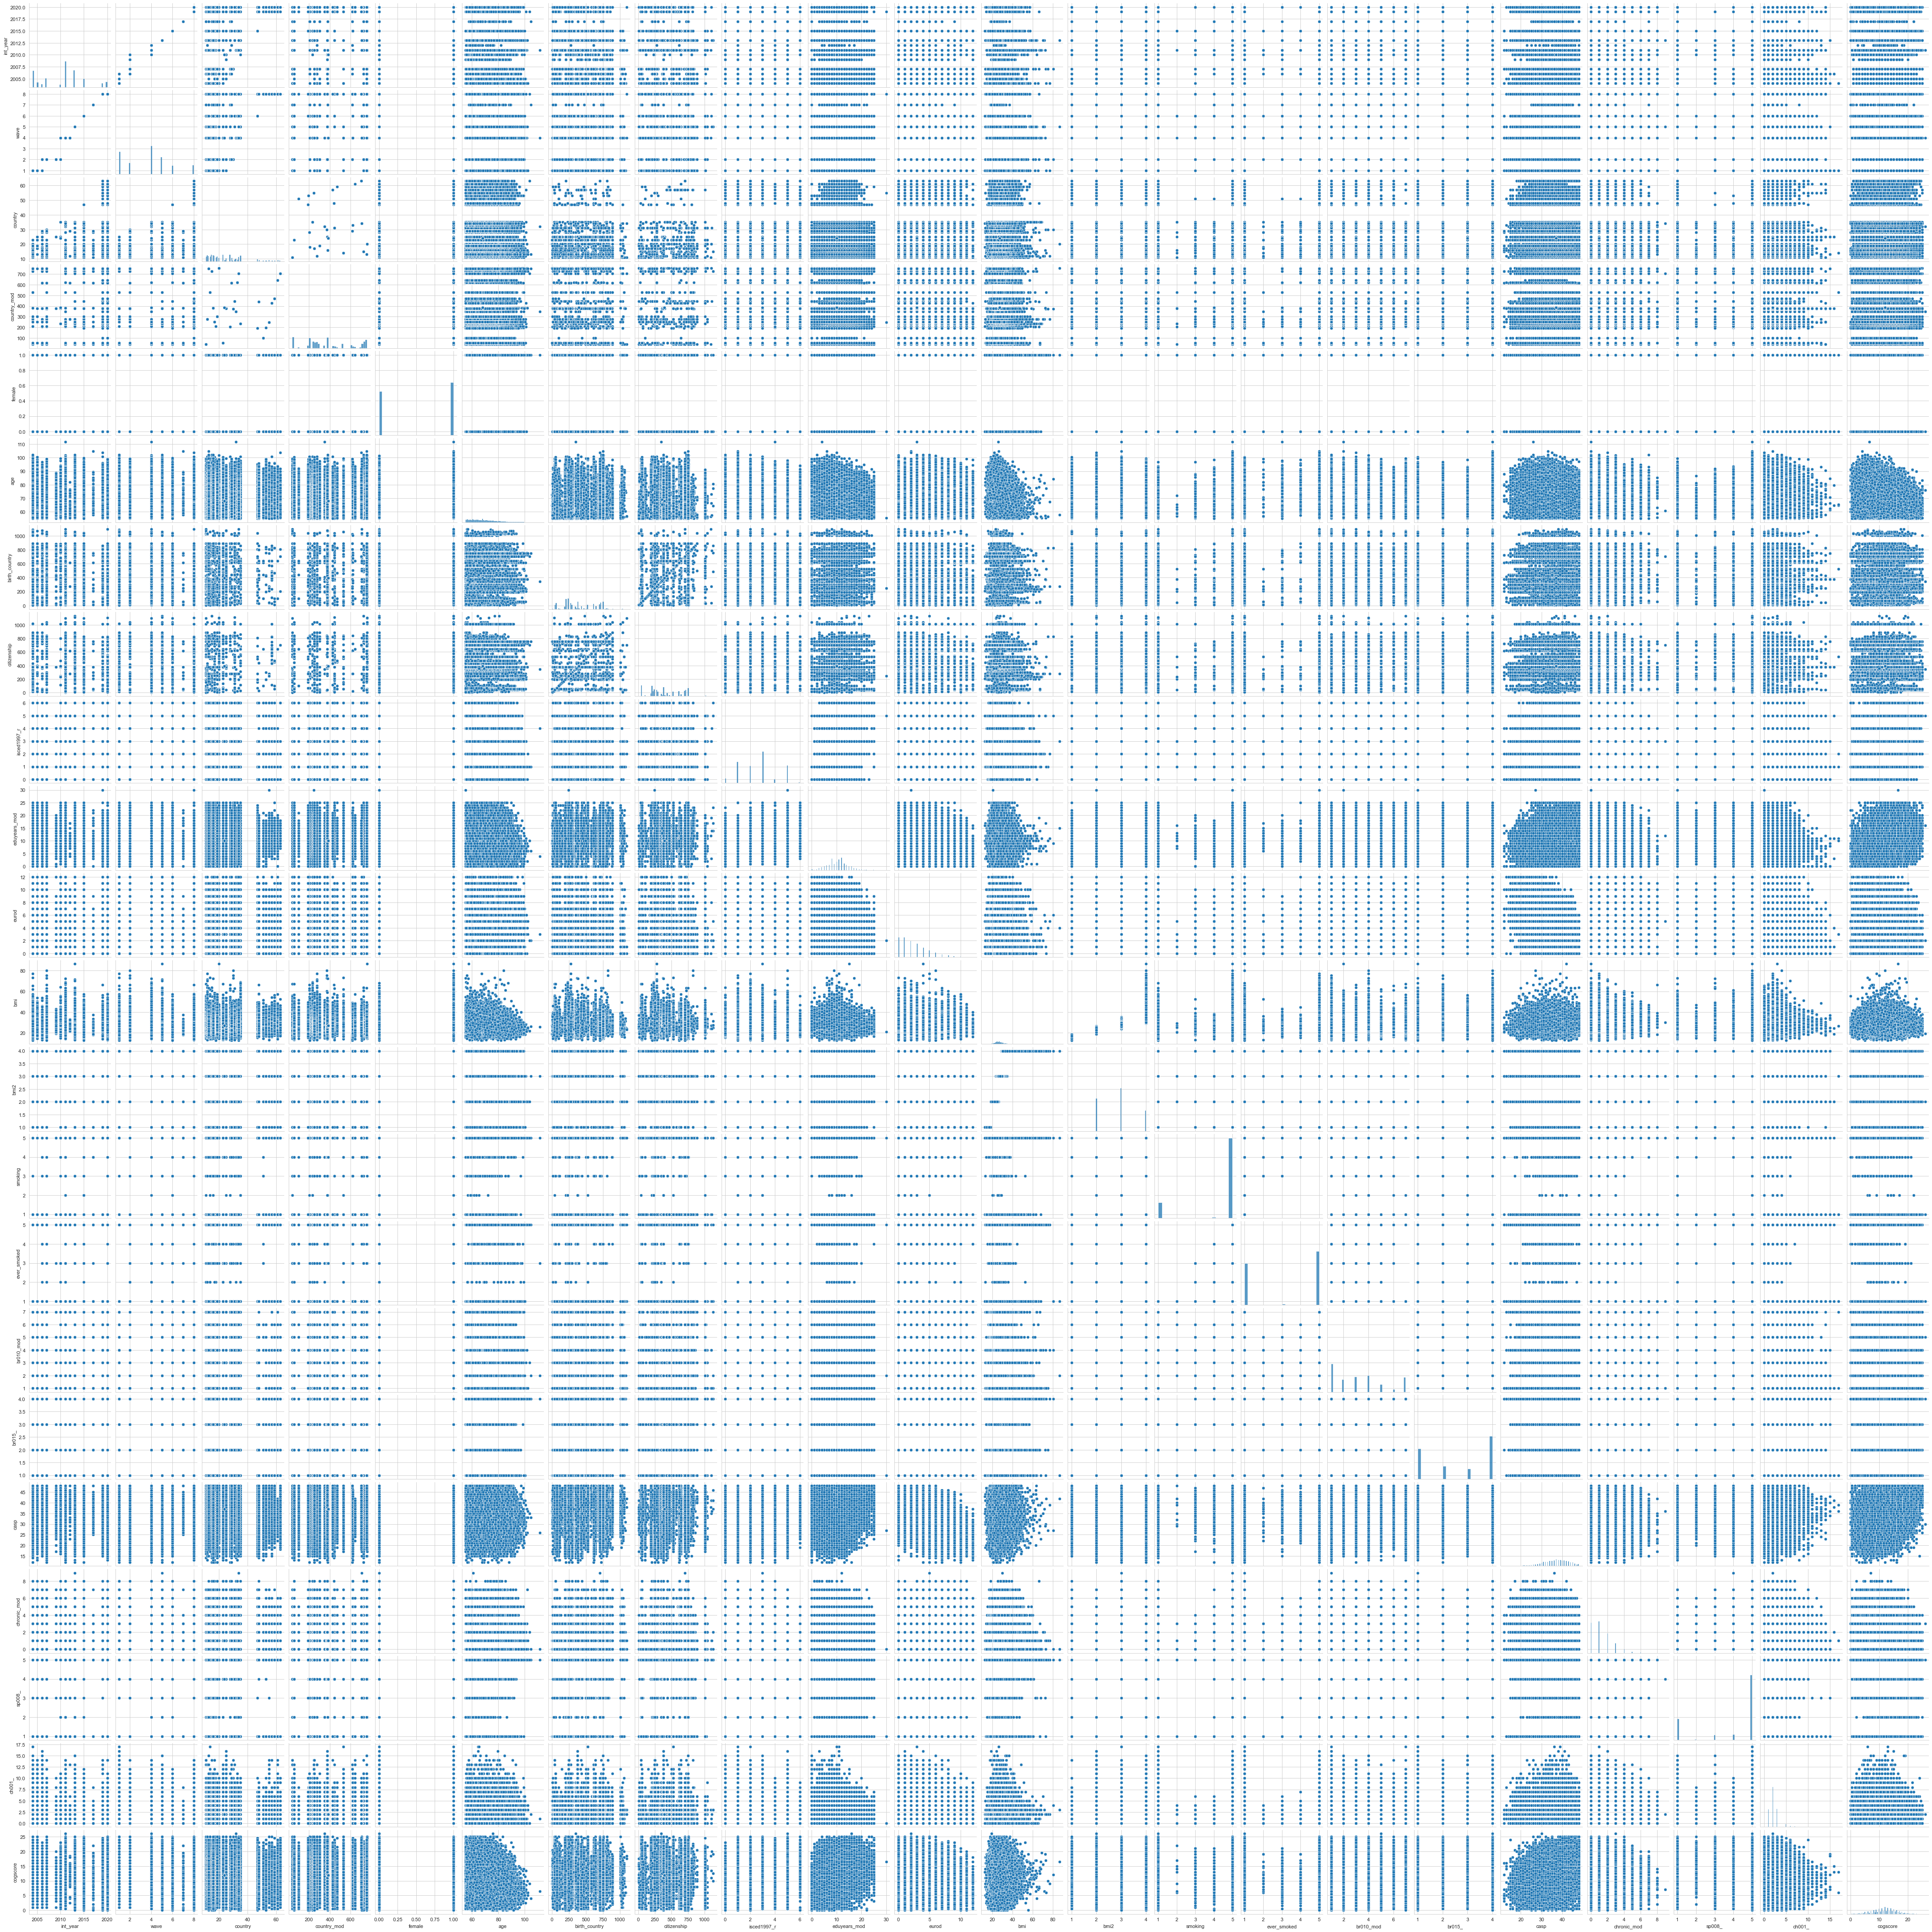

In [18]:
# Draw a pairplot of the numerical variables in the imputed DataFrame
sns.pairplot(df)

Upon reviewing the pairplot, it is evident that `int_year` and `wave` are correlated, as seen by a visible pattern in their scatterplot. However, other variables in the dataset do not exhibit such clear relationships, with the scatterplots showing a broad and dispersed distribution of data points, suggesting no immediate linear correlations.

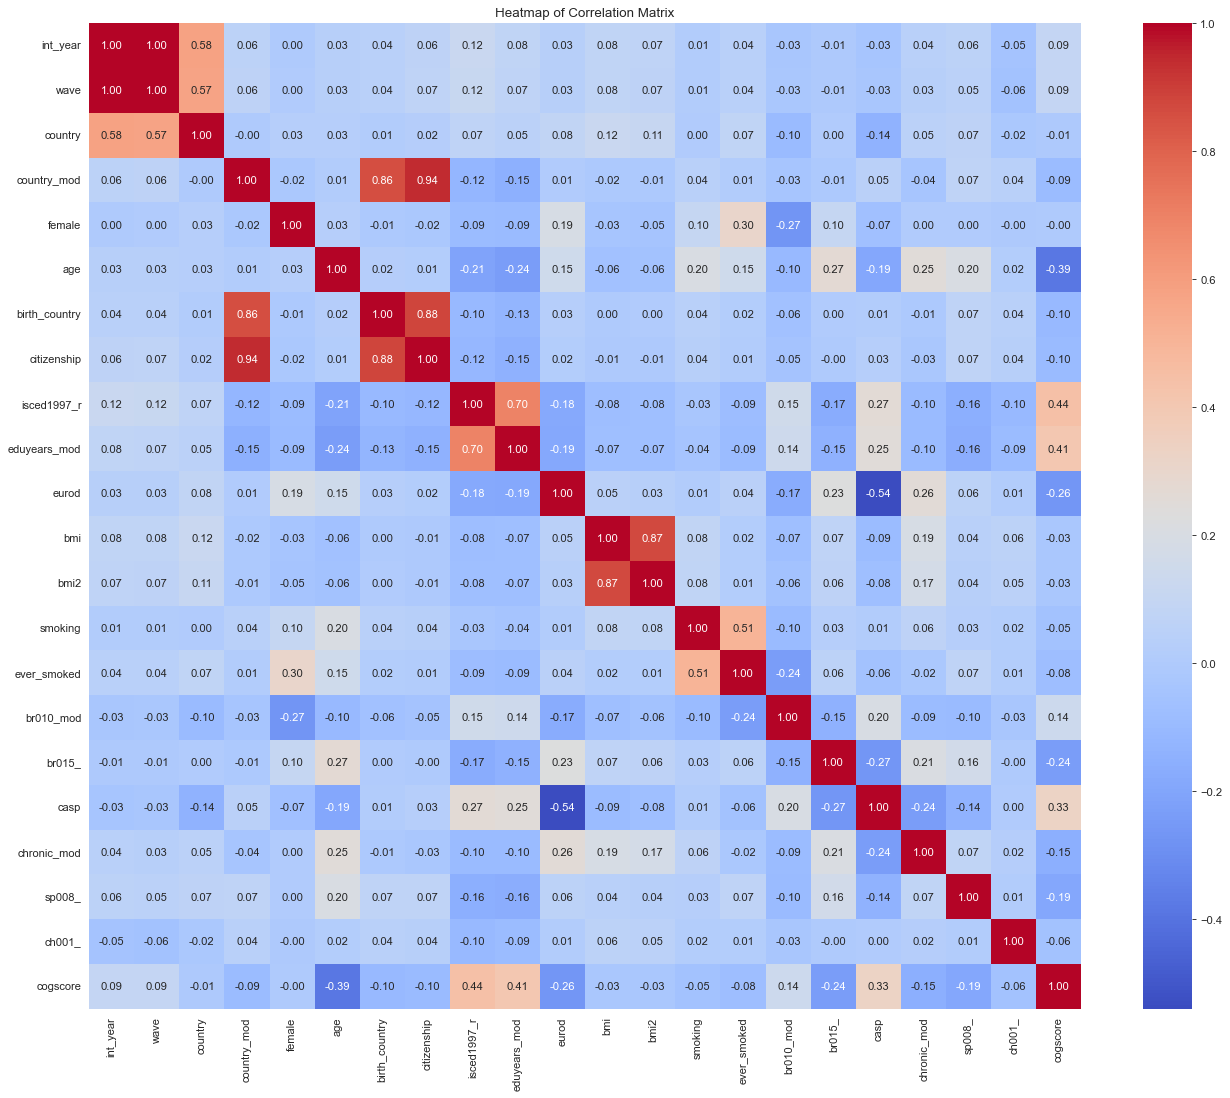

In [19]:
# Find the correlation matrix of the imputed DataFrame
corr = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

The correlation heatmap reveals key insights about the dataset: `int_year` and `wave` have a strong positive correlation, suggesting a time-related link. `smoking` and `ever_smoked` also show a strong positive correlation, as expected due to their direct relationship to smoking behavior. Interestingly,    `age` and `chronic_mod` exhibit a negative correlation, hinting at a complex relationship worth further investigation. `bmi` and `bmi2` are highly correlated, indicating they likely represent similar measurements. Contrary to what one might expect, `citizenship` and `birth_country` do not show a strong correlation, pointing towards a diverse dataset in terms of nationality. Lastly, a positive link between `edu` and `income` supports the common notion that higher education correlates with higher earnings. These relationships set the stage for more detailed statistical analysis and model building.

### Correlation Analysis
From the heatmap we can see that the variable `cogscore` shows varying degrees of correlation with several other factors. It seems to have a moderate positive correlation with `educyears_mod`, `isced1997_r` and `casp` show a positive correlation with `cogscore`. This suggests that: more years of education (`educyears_mod`) and higher educational attainment (`isced1997_r`) are associated with higher cognitive scores. This may reflect the cognitive reserve hypothesis, where education may contribute to the resilience of the brain to neuropathological damage. The `casp` variable, which often measures quality of life or well-being, is positively correlated with cognitive scores, possibly indicating that a higher quality of life is associated with better cognitive function. Conversely, 'cogscore' appears to have a moderate negative correlation with 'age', suggesting that older people tend to have lower cognitive scores. Weak correlations are observed with other variables such as `bmi`, `smoking` and `female`, suggesting that these factors may have less direct effect on cognitive scores. It's important to note that correlation does not imply causation and further analysis would be needed to draw more definitive conclusions.

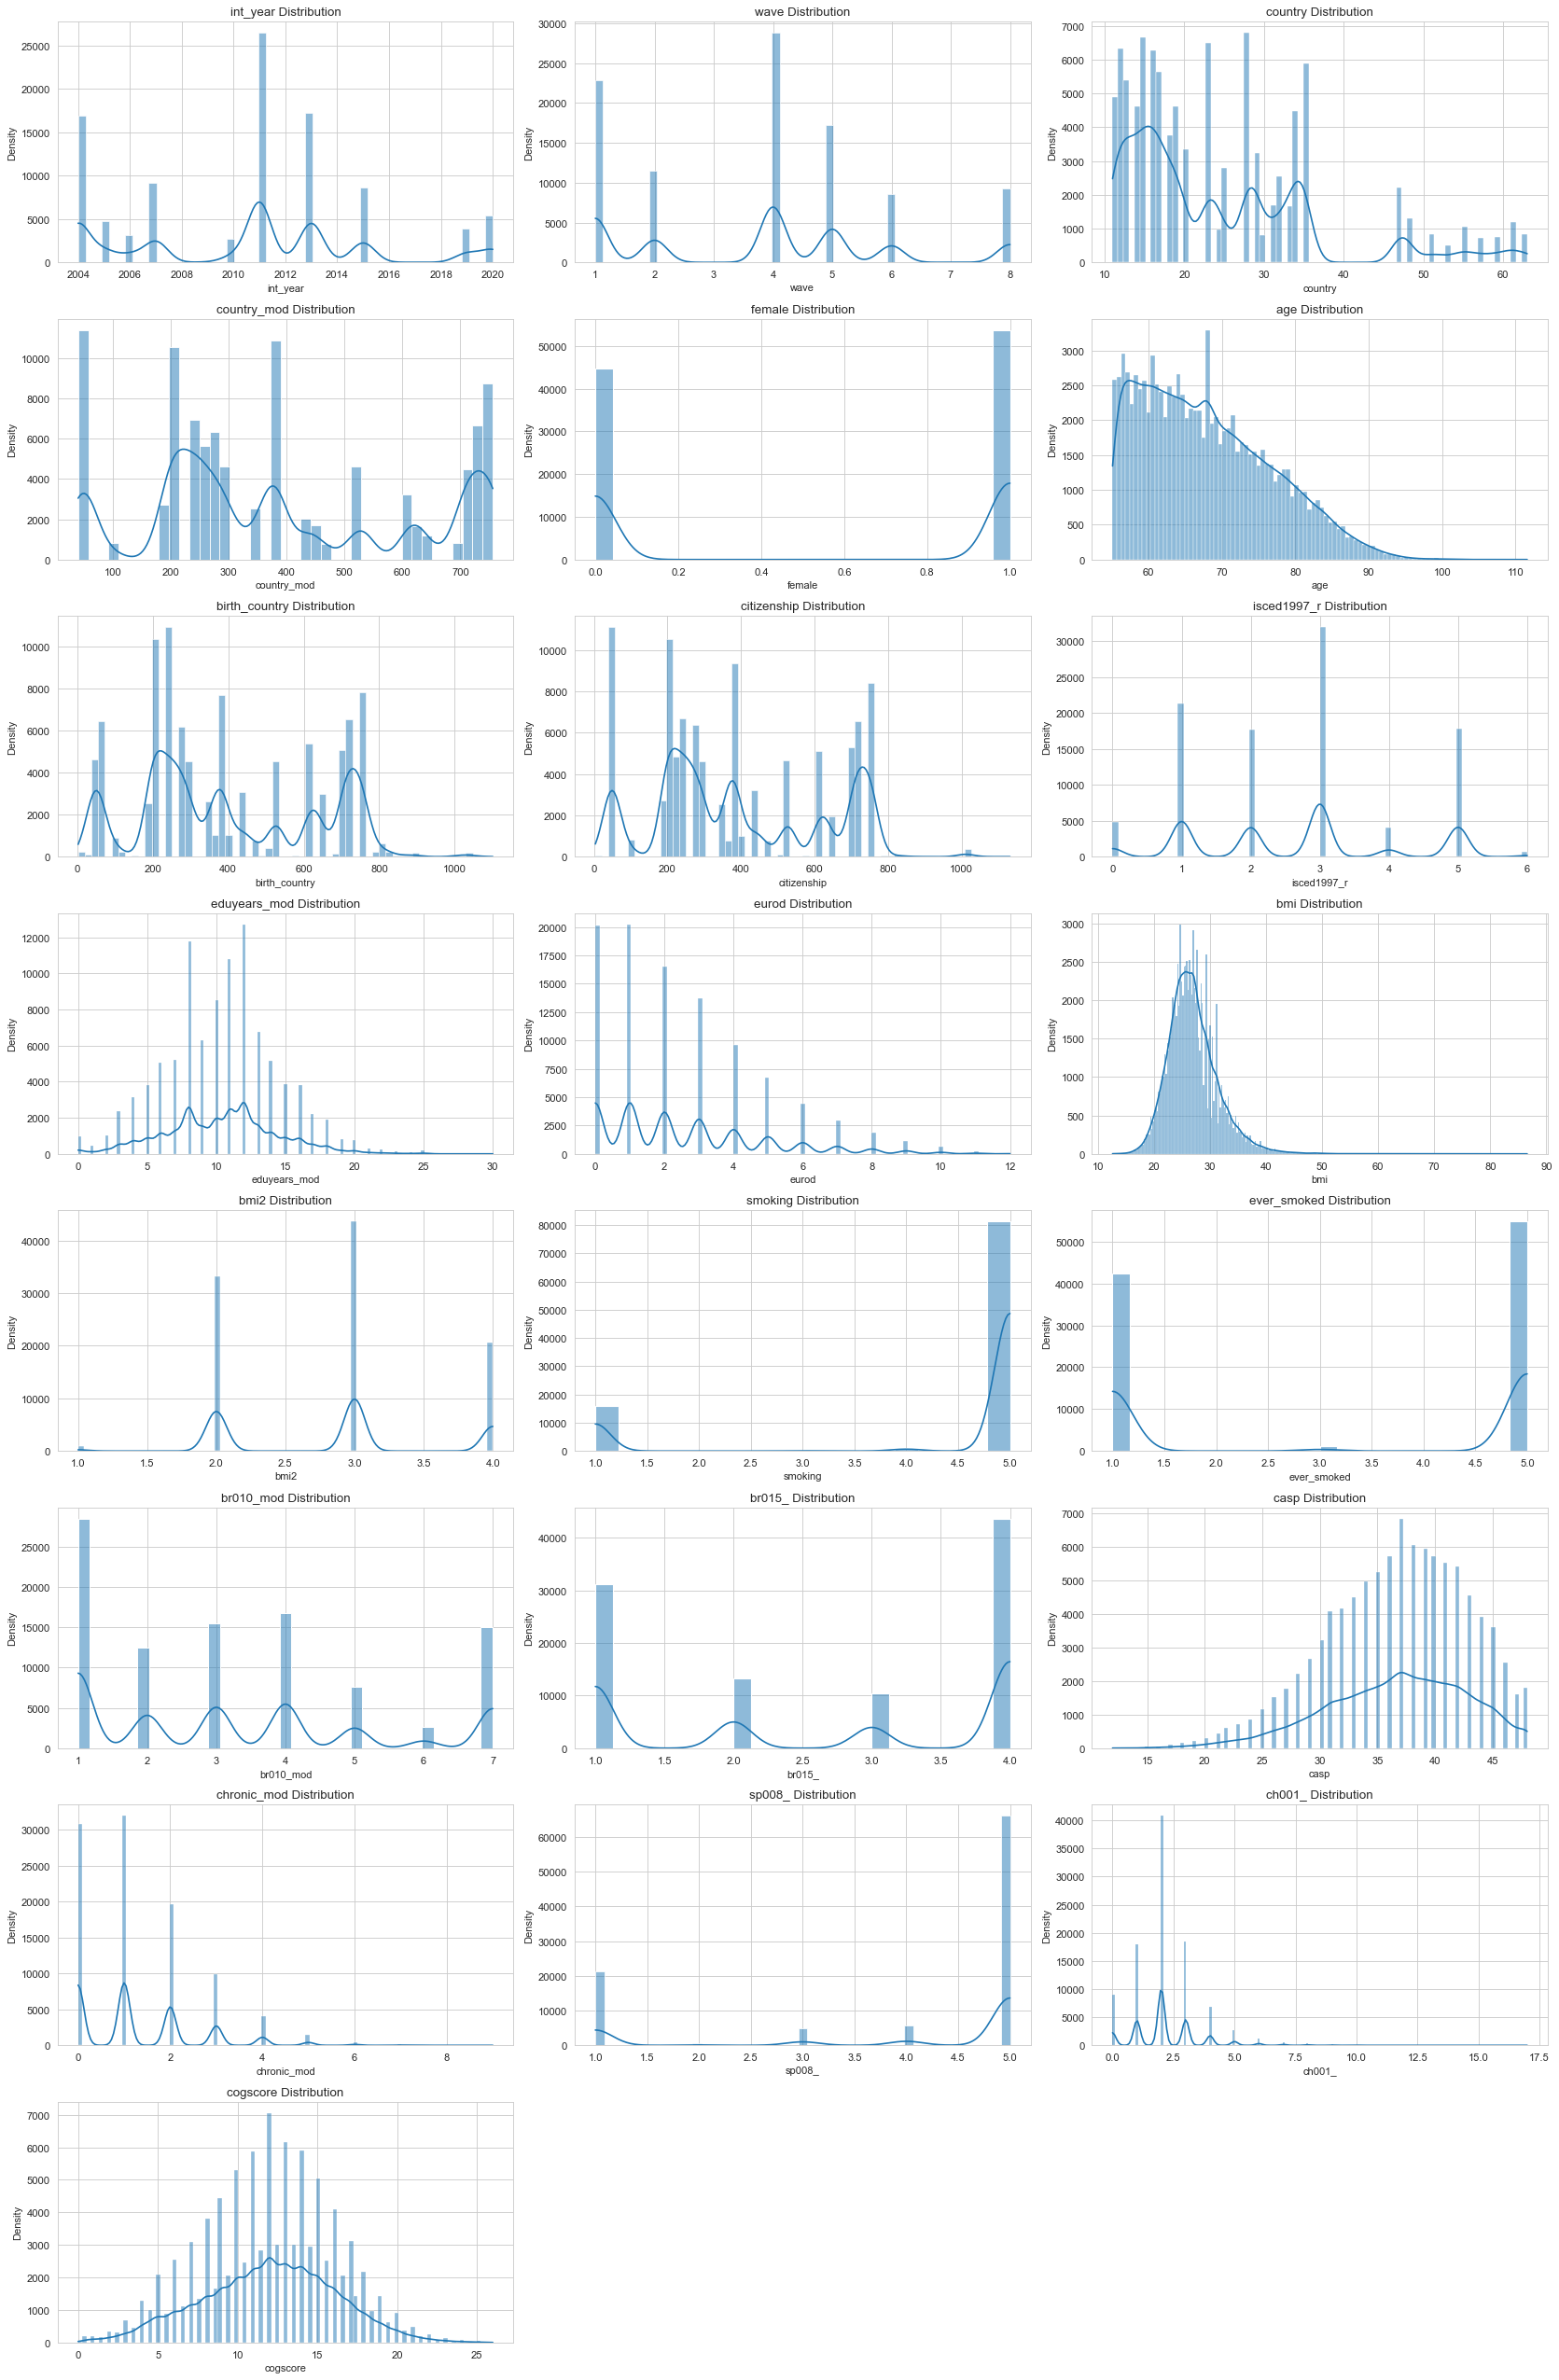

In [20]:
# Select numerical columns
num_cols = df.columns
num_plots = len(num_cols)
cols = 3  # Define the number of columns in subplot grid
rows = num_plots // cols + (num_plots % cols > 0)  # Calculate the required number of rows

# Plot the histograms of the numerical columns
plt.figure(figsize=(7 * cols, 4 * rows))  # Adjust the overall size of the subplot grid

for i, column in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True)  # Using histplot instead of distplot
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

The dataset features variables with right-skewed distributions, such as `age`, `smoking`, `casp`, `cogscore`, and `chronic_mod`, signifying most values are low with fewer high-value outliers. Such skewness hints at broader demographic and health trends, which could influence policy and resource distribution. To align with many statistical methods requiring normally distributed data, transformations like logarithmic, square root, or inverse are often applied to right-skewed data. These transformations can normalize distributions, making them suitable for analyses and enabling more accurate interpretations. Integrating these steps is crucial, as they affect both the analysis approach and the actionable insights derived from the data, especially in tailoring interventions and policies.

这里表明了为什么有的变量需要换log

## Feature Engineering

### OneHotEncoding to `country_mod` or `country`

### Log 变换 to certain features (这里需要重新确认哪些需要log，和上面的分析保持一致）

In [ ]:
# Introduce log transformation to certain features
df['log_age'] = np.log(df['age'] + 1)  # Apply log transformation to 'age'
df['log_bmi'] = np.log(df['bmi'] + 1)  # Apply log transformation to 'bmi'
df['log_ch001_'] = np.log(df['ch001_'] + 1)  # Apply log transformation to 'ch001_'
df['log_chronic_mod'] = np.log(df['chronic_mod'] + 1)  # Apply log transformation to 'chronic_mod'
df['log_eurod'] = np.log(df['eurod'] + 1)  # Apply log transformation to 'eurod'
df['log_casp'] = np.log(df['casp'] + 1)  # Apply log transformation to 'casp'

# Now, the DataFrame 'df' contains both the original and the log-transformed columns.
# Displaying the head of the DataFrame to verify the log-transformed columns
df[['log_age', 'log_bmi', 'log_ch001_', 'log_chronic_mod', 'log_eurod', 'log_casp']].head()

#### 假如说我们加上新的features可以定一个新的X_new_features来区分开原本的X

#### 加上以上这些feature之后是否需要PCA？

#### Train-Test Split

In [28]:
# Create Train and Test Data Frames
X = df.drop('cogscore', axis=1)  # Features
y = df['cogscore']  # Target

# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
# Fix the random state = 42 for reproducibility 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 用新的new feature set再分一次 train和test

## Finding the Best Features for Predicting Cognitive Scores

In the pursuit of identifying the key predictors for cognitive scores, consider employing the following methodologies:

1. **Correlation Analysis**: Initiate by conducting a correlation analysis to pinpoint features with the most substantial correlations to cognitive scores.

2. **Feature Importance**: Deploy machine learning algorithms such as decision trees or ensemble methods like Random Forest, which can elucidate the importance scores of various features.

3. **Univariate Selection**: Engage in statistical testing to select individual features that demonstrate a potent relationship with the cognitive scores.

4. **Wrapper Methods**: Implement Recursive Feature Elimination (RFE) to systematically exclude features deemed least critical in predicting the outcome.

5. **Principal Component Analysis (PCA)**: Consider PCA to determine if a compressed set of components might predict cognitive scores as effectively as the full set of original features.

The application of these systematic methods is critical in refining the predictive model for cognitive scores.

### Feature Importance 下面的X使用所有的x features！

Random Forest is an ensemble machine learning algorithm that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random forests correct for decision trees' habit of overfitting to their training set. It's well-suited for a wide range of data problems and is robust against overfitting. The "random" part comes from the fact that it uses a random subset of features to split nodes in each decision tree, providing a diverse set of trees for the final prediction. The feature importance scores from a Random Forest model can be used to identify the most important features for predicting cognitive scores.

In [30]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate the performance using an appropriate regression metric, such as Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame to find the most important features
feature_importance_df.sort_values('importance', ascending=False, inplace=True)
print(feature_importance_df.head())

Mean Squared Error: 10.736470316840176
         feature  importance
5            age    0.182757
8    isced1997_r    0.178788
11           bmi    0.100038
17          casp    0.083287
9   eduyears_mod    0.071588


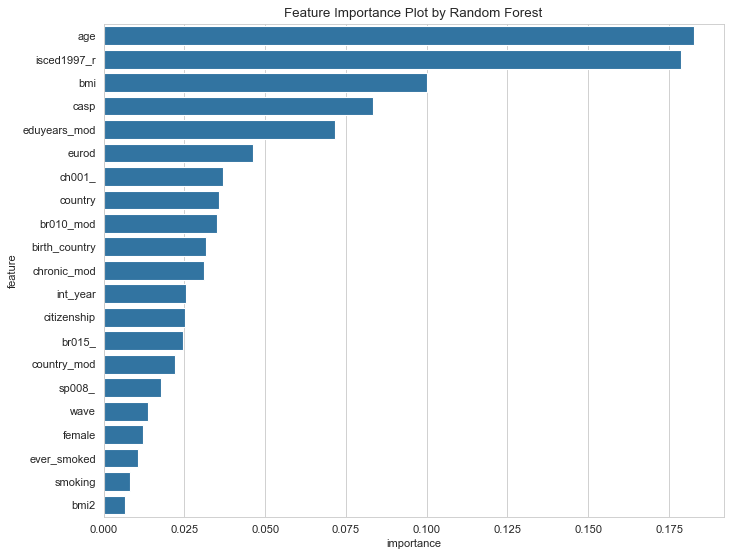

In [31]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance Plot by Random Forest')
plt.show()

**Comments:**

### Univariate Selection

Univariate Selection in the context of feature selection refers to methods that evaluate each feature individually to determine the strength of the relationship of the feature with the response variable. These methods are simple to run and understand and are generally based on univariate statistical tests. For example, this can include techniques like chi-squared tests, ANOVA, or correlation coefficients, depending on whether the features are categorical or continuous. The key idea is to select those features that have the strongest relationship with the output variable. The selected features are often used as input to machine learning models. In the context of regression problems, the f_regression method from scikit-learn's feature_selection module can be used to select the best features based on univariate statistical tests.

In [35]:
# Select top k features based on their relationship with the target variable
# f_regression is used here since we're dealing with a regression problem
selector = SelectKBest(score_func=f_regression, k='all')  # Use k='all' to select all features, or replace with desired number

# Fit to the data and transform it
X_new = selector.fit_transform(X, y)

# Get the scores of the features
scores = selector.scores_

# Create a DataFrame of features and their corresponding scores
features_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by their scores in descending order
features_scores_sorted = features_scores.sort_values(by='Score', ascending=False)

print(features_scores_sorted)

          Feature         Score
8     isced1997_r  23738.585462
9    eduyears_mod  19445.448609
5             age  17242.630013
17           casp  11750.857965
10          eurod   7411.489210
16         br015_   5866.260407
19         sp008_   3878.748852
18    chronic_mod   2412.039882
15      br010_mod   1915.614813
6   birth_country   1008.938679
7     citizenship    947.205070
1            wave    876.320980
0        int_year    850.530679
3     country_mod    817.088462
14    ever_smoked    642.538058
20         ch001_    313.978025
13        smoking    275.169959
11            bmi     76.097168
12           bmi2     75.530827
2         country      6.972013
4          female      0.064094


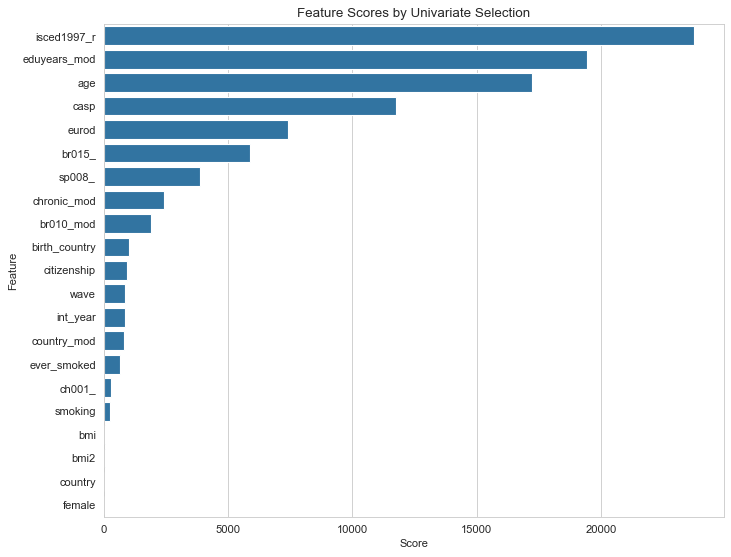

In [36]:
# Plot the feature scores
plt.figure(figsize=(10, 8))
sns.barplot(x='Score', y='Feature', data=features_scores_sorted)
plt.title('Feature Scores by Univariate Selection')
plt.show()

**Comments:**

### Wrapper Methods

Wrapper methods are a type of feature selection that use a predictive model to score feature subsets and select the best-performing features according to model performance. Unlike filter methods, which use statistical techniques to evaluate the relationship between each feature and the target variable, wrapper methods assess subsets of features based on their usefulness to a given model.

Key characteristics of wrapper methods include:

1. **Search Strategy:** They involve a search through the space of possible feature subsets, which can be done exhaustively or through heuristic search strategies like forward selection, backward elimination, or recursive feature elimination.
2. **Model Feedback:** In each iteration, the method uses a model to assess the performance of feature subsets.
3. **Computationally Intensive:** Because they require fitting models on different subsets of features, wrapper methods can be computationally expensive, especially with large numbers of features.
4. **Model Specific:** The feature subsets selected are tailored to the predictive model used in the selection process.

Examples of wrapper methods include Recursive Feature Elimination (RFE), Sequential Feature Selector, and genetic algorithms for feature selection. These methods can be used with a variety of predictive models, such as linear regression, support vector machines, or decision trees.

In [38]:
# Initialize the Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE with the random forest regressor
selector = RFE(rfr, n_features_to_select=5, step=1)

# Fit RFE
selector = selector.fit(X_train, y_train)

# Create a DataFrame to display feature importance
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Importance': selector.ranking_})

# Sort the DataFrame based on the RFE ranking
feature_ranking_sorted = feature_ranking.sort_values('Importance', ascending=True)

print(feature_ranking_sorted.head(10))

          Feature  Importance
17           casp           1
11            bmi           1
5             age           1
6   birth_country           1
8     isced1997_r           1


**Comments:**

### Principal Component Analysis (PCA)

In [ ]:
# 标准化特征
X_scaled = StandardScaler().fit_transform(X)

# 应用PCA
pca = PCA()
pca.fit(X_scaled)

# 获取每个主成分解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 计算绝对值系数
absolute_components = np.abs(pca.components_)

# 将绝对值系数乘以解释的方差比例
weighted_components = absolute_components.T @ explained_variance_ratio

# 计算每个特征的加权平均绝对值系数
#weighted_average_coefficients = np.mean(weighted_components, axis=1)

# 创建一个DataFrame来展示结果
features = X.columns
weighted_average_df = pd.DataFrame(weighted_components, index=features, columns=['Weighted Average Coefficients'])

weighted_average_df_sorted = weighted_average_df.sort_values(by='Weighted Average Coefficients', ascending=False)

# Calculate PCA for the log-transformed features
# Adding a small value before taking log to avoid log(0) which is undefined
X_log = np.log(X + 1)

# 标准化特征
X_scaled = StandardScaler().fit_transform(X_log)

# 应用PCA
pca = PCA()
pca.fit(X_scaled)

# 获取每个主成分解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 计算绝对值系数
absolute_components = np.abs(pca.components_)

# 将绝对值系数乘以解释的方差比例
weighted_components = absolute_components.T @ explained_variance_ratio

# 计算每个特征的加权平均绝对值系数
#weighted_average_coefficients = np.mean(weighted_components, axis=1)

# 创建一个DataFrame来展示结果
features = X.columns
weighted_log_df = pd.DataFrame(weighted_components, index=features, columns=['Weighted Average Coefficients'])

weighted_log_df_sorted = weighted_log_df.sort_values(by='Weighted Average Coefficients', ascending=False)

# For calculating PCA on the square of each variable, first square the features
X_squared = X ** 2

# 标准化特征
X_scaled = StandardScaler().fit_transform(X_squared)

# 应用PCA
pca = PCA()
pca.fit(X_scaled)

# 获取每个主成分解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 计算绝对值系数
absolute_components = np.abs(pca.components_)

# 将绝对值系数乘以解释的方差比例
weighted_components = absolute_components.T @ explained_variance_ratio

# 创建一个DataFrame来展示结果
features = X.columns
weighted_squared_df = pd.DataFrame(weighted_components, index=features, columns=['Weighted Average Coefficients'])

weighted_squared_df_sorted = weighted_squared_df.sort_values(by='Weighted Average Coefficients', ascending=False)


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original Features PCA
axs[0].bar(weighted_average_df_sorted.index, weighted_average_df_sorted['Weighted Average Coefficients'],
           color='skyblue')
axs[0].set_title('Squared Features', fontsize=14)
axs[0].set_xlabel('Features', fontsize=12)
axs[0].set_ylabel('Weighted Average Coefficients', fontsize=12)
axs[0].tick_params(axis='x', rotation=90)

# Squared Features PCA
axs[1].bar(weighted_squared_df_sorted.index, weighted_squared_df_sorted['Weighted Average Coefficients'],
           color='skyblue')
axs[1].set_title('Squared Features', fontsize=14)
axs[1].set_xlabel('Features', fontsize=12)
axs[1].set_ylabel('Weighted Average Coefficients', fontsize=12)
axs[1].tick_params(axis='x', rotation=90)

# Weighted Average Coefficients for Log-transformed Features
axs[2].bar(weighted_average_df_sorted.index, weighted_average_df_sorted['Weighted Average Coefficients'],
           color='skyblue')
axs[2].set_title('Weighted Average Coefficients - Log Features', fontsize=14)
axs[2].set_xlabel('Features', fontsize=12)
axs[2].set_ylabel('Weighted Average Coefficients', fontsize=12)
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

The bar charts represent the weighted average coefficients derived from PCA after applying different transformations to the dataset. Higher coefficients suggest features that contribute more significantly to the variance explained by the principal components. These features are considered more informative and may be more relevant for predicting cognitive scores.
We can see that the ranking of features changes within this three distict form of features.

# Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, interaction terms, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validating it.*

*For example if you considered a linear regression model, a polynomial regression, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

*Finally, you should also provide comparison of your model with baseline model(s) on the test data but only briefly describe the baseline model(s) considered*

### Regression Assumption Test

Durbin-Watson test statistic: 1.7962169157936907


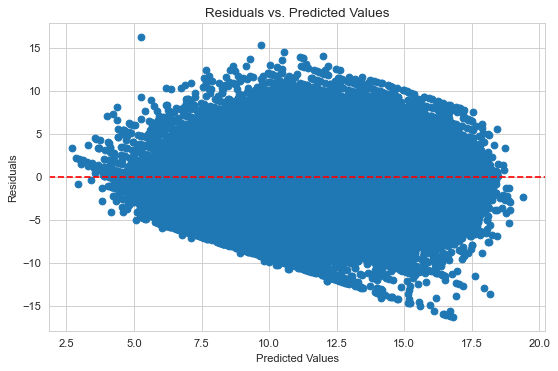

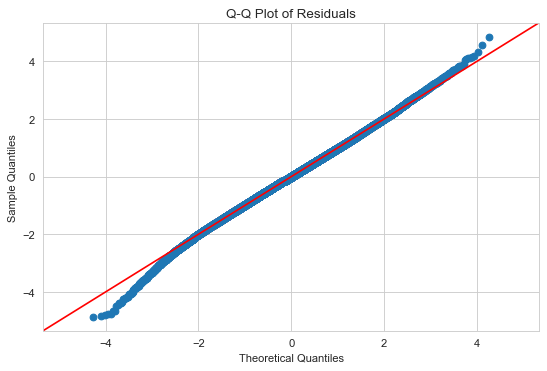

Shapiro-Wilk test statistic: 0.9992161393165588, p-value: 3.798651704257495e-19


/Users/scarlettj/Library/Python/3.9/lib/python/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [42]:
# Adding a constant to the predictor variables to include an intercept in the model
X_const = sm.add_constant(X)

# Fitting the linear regression model using Ordinary Least Squares (OLS)
model = sm.OLS(y, X_const).fit()

# Extracting the residuals from the model for diagnostic tests
residuals = model.resid

# Durbin-Watson Test for checking the independence of residuals
# It tests the null hypothesis that the residuals are not autocorrelated.
from statsmodels.stats.stattools import durbin_watson
dw_test_stat = durbin_watson(residuals)
print(f'Durbin-Watson test statistic: {dw_test_stat}')
# A Durbin-Watson statistic close to 2 suggests no autocorrelation,
# while values closer to 0 or 4 indicate positive or negative autocorrelation, respectively.

# Plotting residuals vs. predicted values to check for homoscedasticity (constant variance)
plt.scatter(model.predict(), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # A horizontal line at 0 to aid in visualization
plt.title('Residuals vs. Predicted Values')
# For homoscedasticity, the spread of residuals should be consistent across all levels of predicted values.
plt.show()

# Normality of residuals using a Q-Q plot and Shapiro-Wilk test
# A Q-Q plot compares the quantiles of residuals to the quantiles of a normal distribution.
fig = sm.qqplot(residuals, stats.norm, fit=True, line='45')
plt.title('Q-Q Plot of Residuals')
# Points following the line suggest the residuals are normally distributed.
plt.show()

# Shapiro-Wilk Test for normality of residuals
# It tests the null hypothesis that the data was drawn from a normal distribution.
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {stat}, p-value: {p_value}')
# A p-value greater than 0.05 typically suggests that the null hypothesis cannot be rejected,
# indicating the residuals are normally distributed.

In [43]:
# Checking for multicollinearity using Variance Inflation Factors (VIF)
robust_model = model.get_robustcov_results(cov_type='HC1')

print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:               cogscore   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     2770.
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:16:09   Log-Likelihood:            -2.5855e+05
No. Observations:               98348   AIC:                         5.171e+05
Df Residuals:                   98326   BIC:                         5.174e+05
Df Model:                          21                                         
Covariance Type:                  HC1                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           171.5651     46.086      3.723

In [44]:
# Extracting the summary table as a DataFrame
results_summary = model.summary2().tables[1]

# Filtering variables with p-values less than 0.05
significant_vars = results_summary[results_summary['P>|t|'] < 0.05]

# Getting the names of significant variables
significant_var_names = significant_vars.index.tolist()

# Printing the names of variables with p < 0.05
print("Variables with p < 0.05:", significant_var_names)

Variables with p < 0.05: ['const', 'int_year', 'wave', 'country', 'female', 'age', 'birth_country', 'citizenship', 'isced1997_r', 'eduyears_mod', 'eurod', 'smoking', 'ever_smoked', 'br010_mod', 'br015_', 'casp', 'chronic_mod', 'sp008_', 'ch001_']


In [45]:
# Initialize an empty DataFrame to store VIF values
vif = pd.DataFrame()

# Calculate VIF for each explanatory variable
# variance_inflation_factor function computes the VIF for a given predictor.
# It requires the full dataset (with constant term) and the index of the variable for which the VIF is to be calculated.
# We iterate over all variables using a for loop and their corresponding index.
vif["VIF Factor"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Store the names of the features (variables) in the DataFrame
vif["features"] = X_const.columns

# Print the DataFrame containing VIF values
# A VIF value greater than 5 (or sometimes 10) suggests that the predictor is highly correlated with other predictors,
# indicating the presence of multicollinearity.
print(vif)

      VIF Factor       features
0   2.033649e+07          const
1   1.077937e+02       int_year
2   1.063944e+02           wave
3   1.591421e+00        country
4   9.462725e+00    country_mod
5   1.217877e+00         female
6   1.290616e+00            age
7   4.656368e+00  birth_country
8   1.106533e+01    citizenship
9   2.041936e+00    isced1997_r
10  2.034745e+00   eduyears_mod
11  1.517464e+00          eurod
12  4.195567e+00            bmi
13  4.137988e+00           bmi2
14  1.416260e+00        smoking
15  1.536487e+00    ever_smoked
16  1.186929e+00      br010_mod
17  1.189587e+00         br015_
18  1.605477e+00           casp
19  1.208951e+00    chronic_mod
20  1.092831e+00         sp008_
21  1.024245e+00         ch001_


#### Model Function

In [47]:
# Define a model fit function
def model_fit(m, X, y, plot = False):
    """Returns the mean squared error, root mean squared error and R^2 value of a fitted model based 
    on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    MSE = mean_squared_error(y, y_hat)
    RMSE = np.sqrt(mean_squared_error(y, y_hat))
    Rsqr = r2_score(y, y_hat)
    
    Metrics = (round(MSE, 4), round(RMSE, 4), round(Rsqr, 4))
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Actual vs Fitted plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y_hat', y='resid', data=res).set_title("Fitted vs Residual plot")
        plt.hlines(y=0, xmin=np.min(y), xmax=np.max(y), linestyles='dashed', alpha=0.3, colors="black")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model (MSE, RMSE, Rsqr) = " + str(Metrics), fontsize=14)
        plt.show()
    
    return Metrics

## Baseline Model -- Linear Regression

Initially, we use a simple linear regression model with all the features as the base model to predict cognitive scores. The linear regression model is a simple approach to modelling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the dependent and independent variables and is widely used in practice because of its simplicity and interpretability. 


In [60]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr_model = lr.fit(X_train, y_train)

# Extract the coefficients and intercept
print(np.c_[np.append(['intercept'],X.columns),np.round(np.append(lr.intercept_,lr.coef_),4)])

[['intercept' 218.4167]
 ['int_year' -0.1016]
 ['wave' 0.4398]
 ['country' -0.0203]
 ['country_mod' 0.0003]
 ['female' 0.6884]
 ['age' -0.1165]
 ['birth_country' -0.0006]
 ['citizenship' -0.0007]
 ['isced1997_r' 0.6416]
 ['eduyears_mod' 0.1168]
 ['eurod' -0.1803]
 ['bmi' 0.0109]
 ['bmi2' -0.0324]
 ['smoking' 0.0549]
 ['ever_smoked' -0.0478]
 ['br010_mod' 0.0417]
 ['br015_' -0.1821]
 ['casp' 0.0742]
 ['chronic_mod' 0.0211]
 ['sp008_' -0.1378]
 ['ch001_' -0.0248]]


The coefficients and intercept of the linear regression model are displayed above. The coefficients represent the change in the dependent variable for a one-unit change in the independent variable, holding all other variables constant. For instance, for a one-unit increase in `iscd1997_r`, the cognitive score is expected to increase by 0.6416, which is the greatest absolute value among the coefficients. These coefficients provide insights into the relationship between the independent and dependent variables, but we are more interested in the predictive performance of the model. The model's performance is evaluated using the mean squared error (MSE), root mean squared error (RMSE), and R-squared ($R^2$) value. These metrics provide a measure of the model's predictive accuracy and the proportion of variance in the dependent variable that can be predicted from the independent variables. The model's assumptions are also tested, including the independence of residuals, homoscedasticity, and normality of residuals. The results of these tests help to determine the reliability of the model and guide further model development.

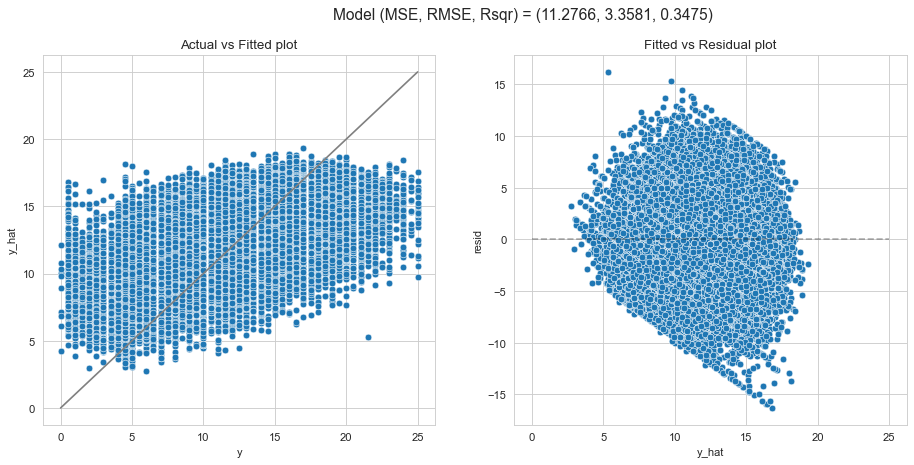

In [61]:
# Evaluate the model using the training data
train_metrics = model_fit(lr, X_train, y_train, plot = True)

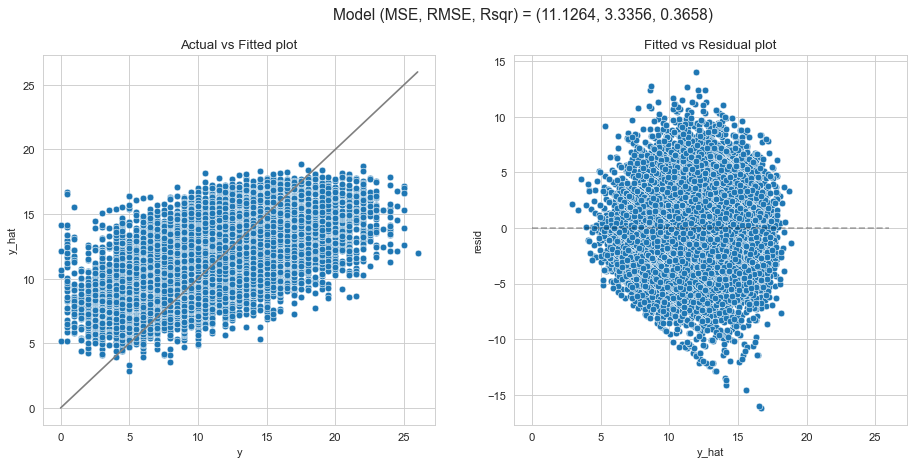

In [62]:
# Evaluate the model using the testing data
test_metrics = model_fit(lr, X_test, y_test, plot = True)

1. **Actual vs Fitted plot:** shows the actual cognitive scores against the predicted scores from the linear regression model. Ideally, all points should fall on the grey line, which represents a perfect match between actual and predicted scores. In our plots of both training and test sets, the points do not fall closely on the line, indicating a large variance in the model's predictions. The model appears to perform slightly better on the test set, as the points are closer to the line. 

2. **Fitted vs. Residual plot:** shows the residuals (differences between actual and predicted values) as a function of the predicted values. Ideally, this plot should show a random scatter of points around the horizontal line at zero, indicating that the model errors are randomly distributed. However, in our plots, the residuals show a clear pattern: an increasing spread as the fitted values increase. This indicates non-constant variance of the residuals (heteroscedasticity), which violates one of the key assumptions of linear regression. There is no obvious systematic pattern indicating non-linearity. This suggests that the model may benefit from transformations of the traits or the inclusion of interaction terms to better capture the relationship between the traits and the target. 

3. **R-squared ($R^2$):** represents the proportion of variance in the dependent variable that can be explained by the independent variables, which is a measure of how well the observed results are replicated by the model. The values (0.3475 for the training set and 0.3658 for the test set) suggest that the model does not explain much of the variance in the outcome variable - less than 40%. This indicates a relatively weak predictive performance of the baseline model for cognitive scores.

4. **MSE & RMSE**: These are measures of average error size. Although they are reasonably small, they do not take into account the proportion of variance explained by the model. The MSE is slightly lower in the test set than in the training set, which is unusual and may suggest that the model fits the test set better or the test set is less varied.

**Why Linear Regression was Chosen and Rejected:**
Linear regression was chosen as the baseline model due to its simplicity and interpretability. It provides a good starting point for understanding the relationship between the features and the target variable. However, it is clear from the model evaluation that the linear regression model has limitations in capturing the complexity of the relationship between the features and cognitive scores. The presence of heteroscedasticity and the low R² values suggest that the model may not be fully capturing the underlying patterns in the data. As a result, more complex models and feature engineering may be necessary to improve the model's predictive power. 

The assumptions of linear regression, such as normality of residuals and independence of errors, are also not fully met, indicating that the model may not be the best fit for the data. As a result, the model could benefit from further refinement, possibly including the addition of interaction terms, nonlinear transformations, or considering different types of models. 

### Linear Regression with Standardized Features

In [70]:
# Make a pipeline to standardize the features and fit a linear regression model
lm_s = make_pipeline(
    StandardScaler(),
    LinearRegression()
).fit(X_train, y_train)

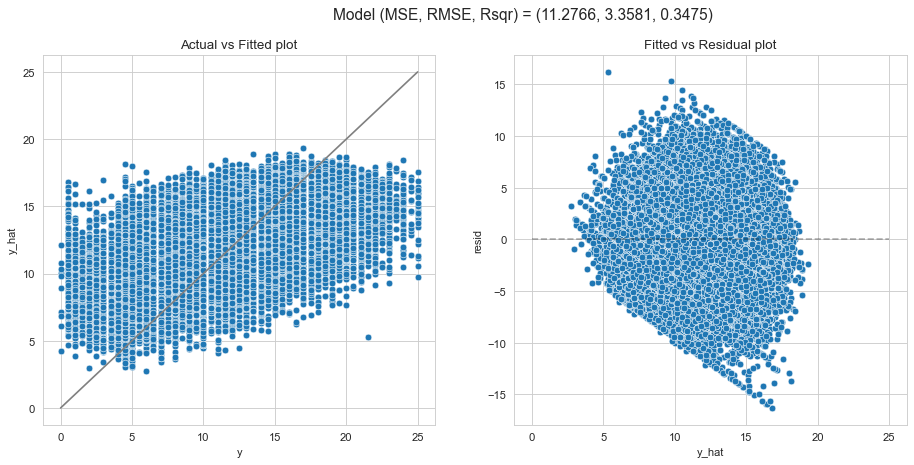

In [73]:
# Evaluate the model using the training data
train_metrics_s = model_fit(lm_s, X_train, y_train, plot = True)

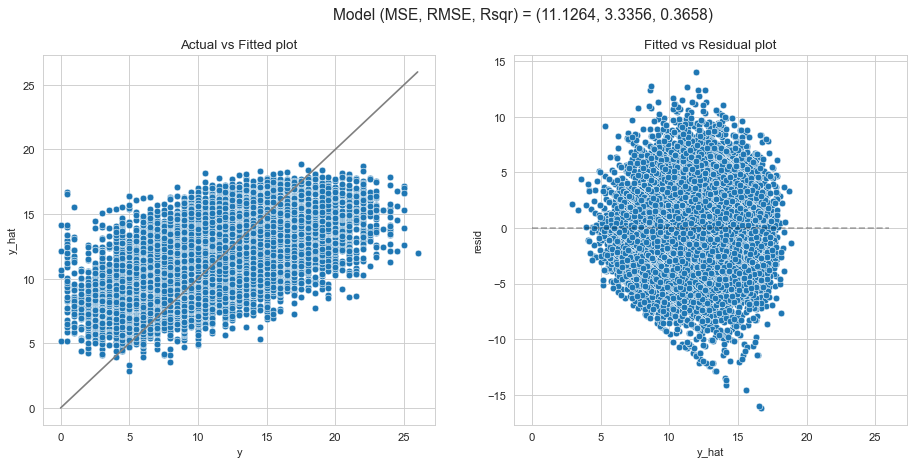

In [74]:
# Evaluate the model using the testing data
test_metrics_s = model_fit(lm_s, X_test, y_test, plot = True)

As we can see, the model is effectively the same as the original linear regression model, indicating that standardizing the features did not significantly improve the model's predictive power. The residual plots also show similar patterns to the original model, suggesting that the assumptions of linear regression are still not fully met. As a result, we will test linear model's performance with transformed features. Moreover, we will explore more advanced models and techniques to improve the model's performance.

### Linear Regression with Transformed Features

## Polynomial Regression

## Regularization - Lasso Regression/ Ridge Regression

## Classification Model - 

# Discussion & Conclusions

*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a government official or charity directy, who is understands the pressing challenges associated with ageining and dementia but may only have university level mathematics (not necessarily postgraduate statistics or machine learning). Your goal should be to highlight to this audience how your model can useful. You should also mention potential limitations of your model.*

*Finally, you should include recommendations on potential lifestyle changes or governmental/societal interventions to reduce dementia risk.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

# References

*Include references if any*

In [ ]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf project1.ipynb